In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats  as stats


In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('concrete_data.csv')

In [11]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
df.shape

(1030, 9)

In [14]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
x  = df.drop(columns=['Strength'])
y  = df.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
lrmodel = LinearRegression()

lrmodel.fit(x_train,y_train)

y_pred = lrmodel.predict(x_test)

r2_score(y_test,y_pred)


0.6275531792314848

In [25]:
lr= LinearRegression()
np.mean(cross_val_score(lrmodel,x,y,scoring='r2'))

np.float64(0.4609940491662864)

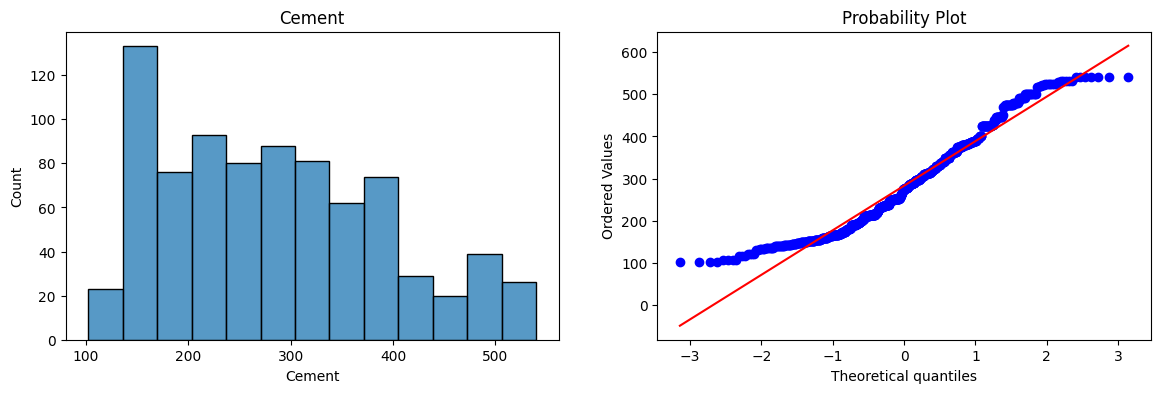

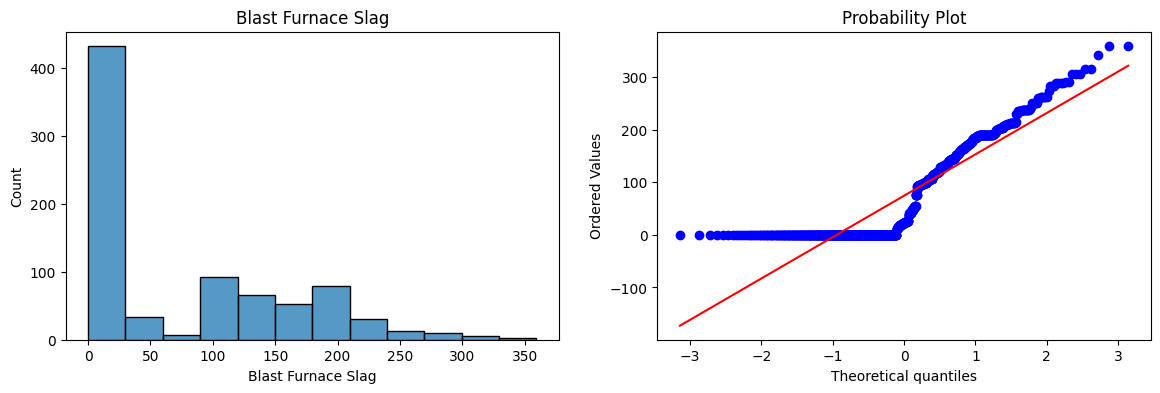

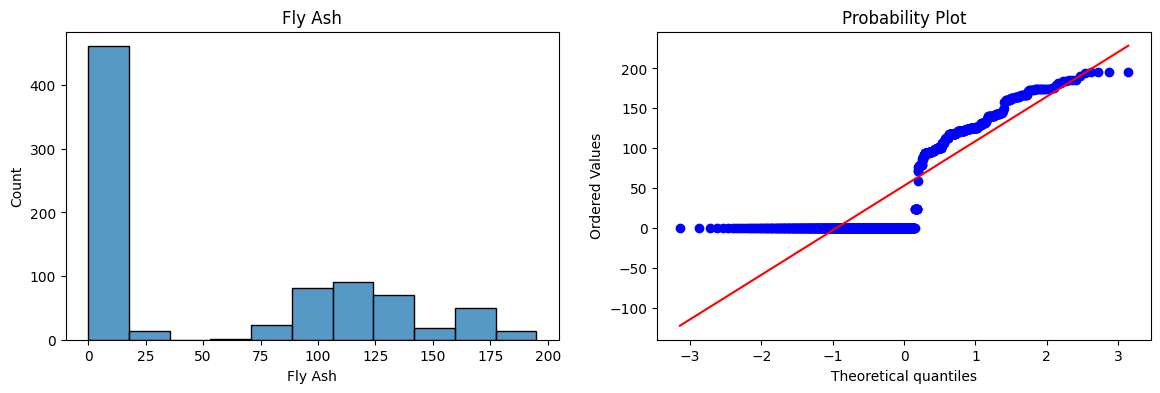

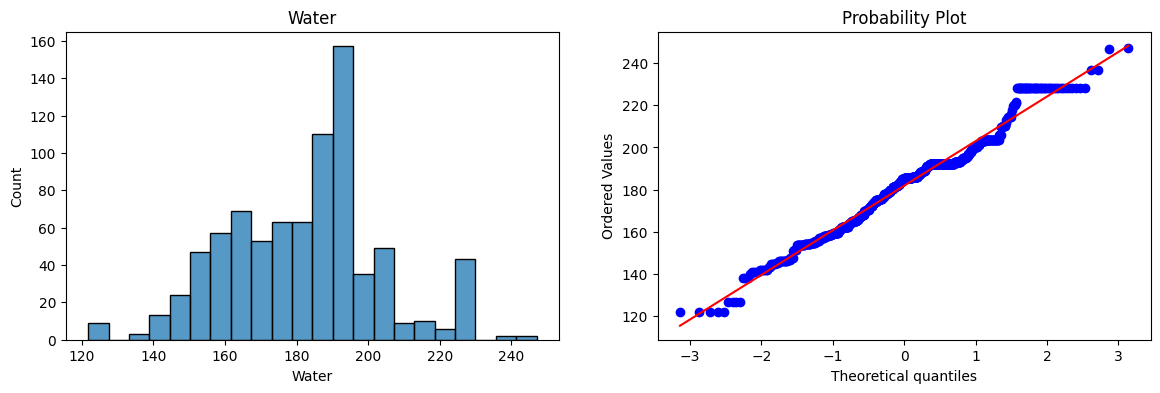

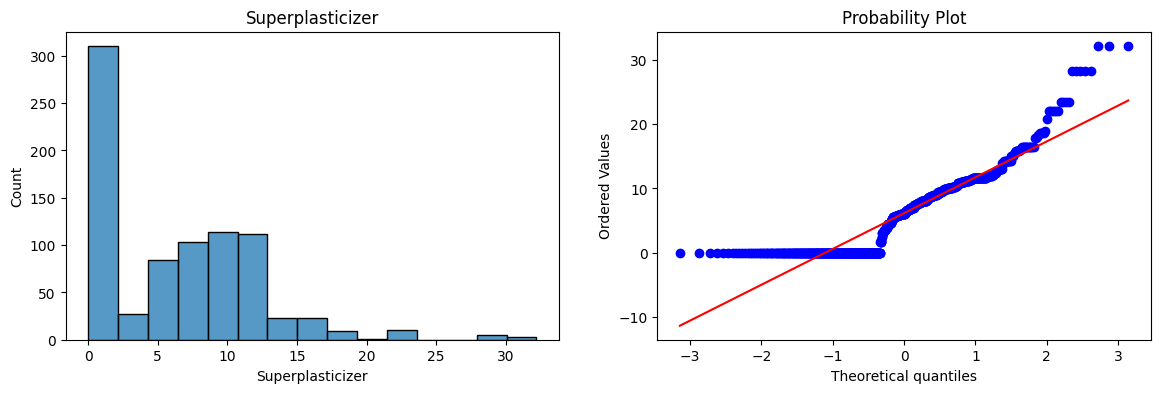

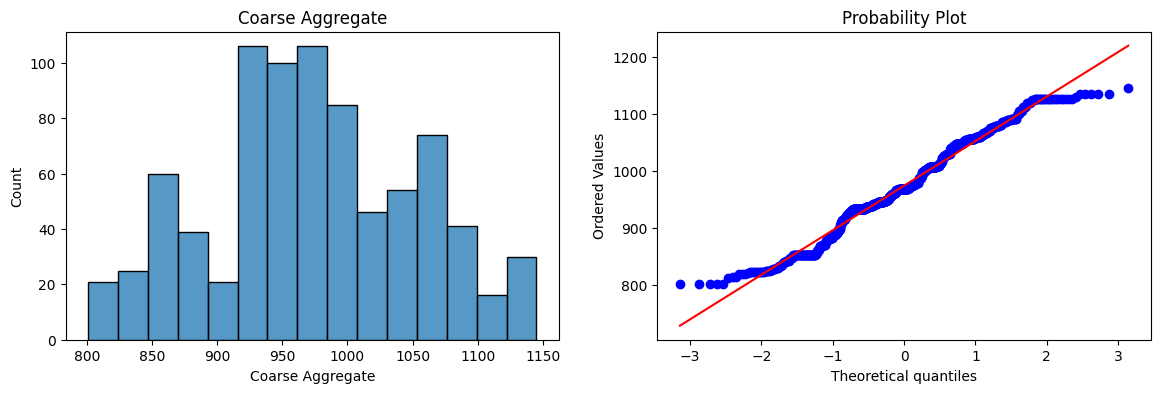

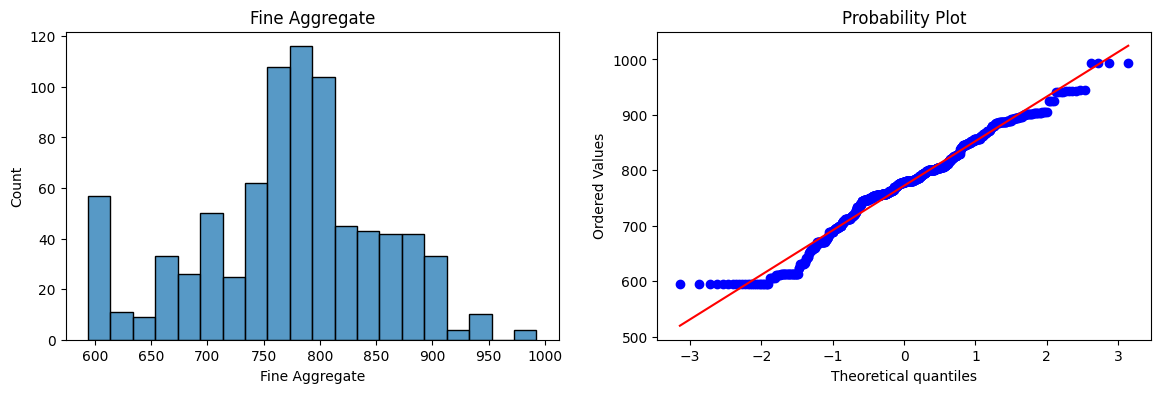

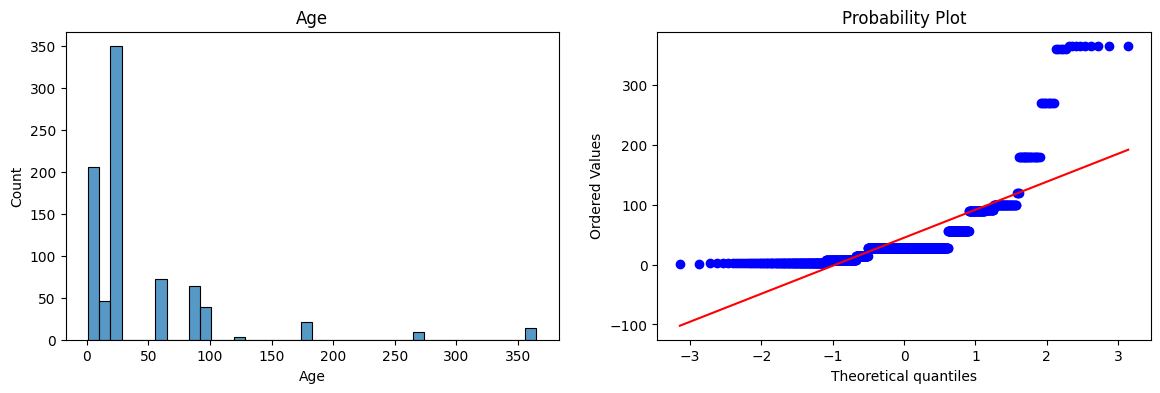

In [27]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sb.histplot(x_train[col])
    plt.title(col)


    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)



In [30]:
pwt = PowerTransformer(method='box-cox')        #needs value of data is to be +ve and > 0

In [33]:
x_traintransf = pwt.fit_transform(x_train+0.00001)
x_testtransf = pwt.fit_transform(x_test+0.00001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambda': pwt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.028899
2,Fly Ash,-0.007561
3,Water,0.959062
4,Superplasticizer,0.119398
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [ ]:
#Applying linear regre
lr  = LinearRegression()

In [40]:
lr.fit(x_traintransf,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
ypredd = lr.predict(x_testtransf)
r2_score(y_test,ypredd)              ##high accuracy

0.8300015808050074

In [47]:
pwt = PowerTransformer(method='box-cox')
x_tranformed = pwt.fit_transform(x +0.000001)

In [49]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x_tranformed,y,scoring='r2'))

np.float64(0.6662950327179041)